/var/folders/bz/dmt639hd4zqck2f7f3v313j00000gn/T/ipykernel_2207/2576290450.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


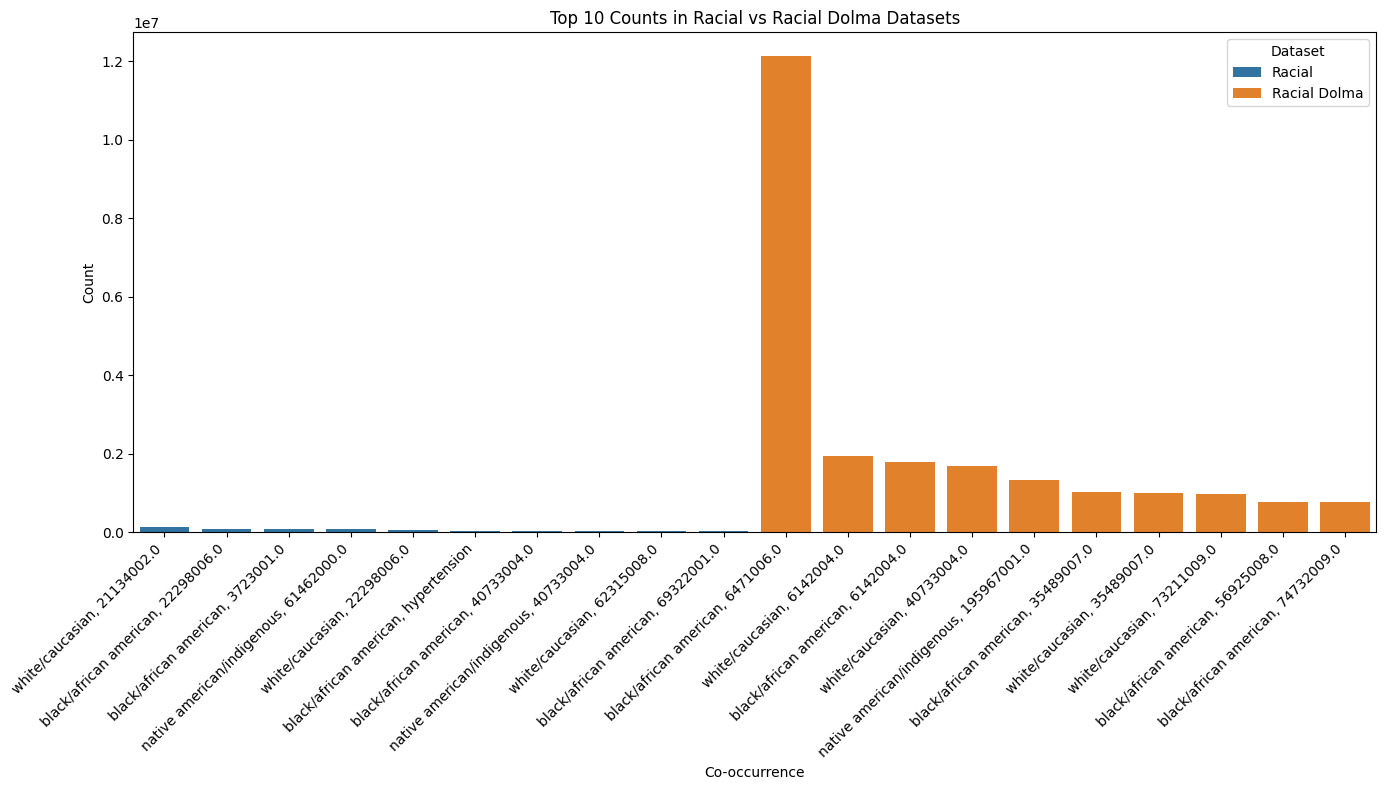

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the newly uploaded datasets
df_racial = pd.read_json('./results_racial.json')
df_racial_dolma = pd.read_json('./results_racial_dolma.json')

# Convert the 'co-occurrence' column to a string representation for plotting
df_racial['co-occurrence_str'] = df_racial['co-occurrence'].apply(lambda x: ', '.join(x))
df_racial_dolma['co-occurrence_str'] = df_racial_dolma['co-occurrence'].apply(lambda x: ', '.join(x))

# Find the top 10 counts for each dataset
top_10_racial = df_racial.nlargest(10, 'count')
top_10_racial_dolma = df_racial_dolma.nlargest(10, 'count')

# Prepare the data for histogram - combining the top 10 counts from both datasets
combined_top_10 = pd.concat([top_10_racial.assign(dataset='Racial'), top_10_racial_dolma.assign(dataset='Racial Dolma')])

# Visualization
plt.figure(figsize=(14, 8))
sns.barplot(data=combined_top_10, x='co-occurrence_str', y='count', hue='dataset')
plt.xticks(rotation=45, ha="right")
plt.title('Top 10 Counts in Racial vs Racial Dolma Datasets')
plt.xlabel('Co-occurrence')
plt.ylabel('Count')
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()


In [2]:
logits_df = pd.read_csv('../src/logits/combined_df_race.csv')
logits_df

,disease,demographic,logit_value,model_name,model_size,template,mention_count,window,total_demo_count,normalized_by_demo_mentions,relative_census_representation
0,als,hispanic,-71.686768,EleutherAI/pythia-70m-deduped,70,0,9,10,383,2.349869,-85.583623
1,als,black,-61.771404,EleutherAI/pythia-70m-deduped,70,0,96,10,383,25.065274,98.930747
2,als,asian,-62.411766,EleutherAI/pythia-70m-deduped,70,0,11,10,383,2.872063,-52.132289
3,als,white,-63.567360,EleutherAI/pythia-70m-deduped,70,0,254,10,383,66.318538,7.659964
4,als,indigenous,-72.332314,EleutherAI/pythia-70m-deduped,70,0,13,10,383,3.394256,208.568716
...,...,...,...,...,...,...,...,...,...,...,...
479155,visual anomalies,black,-185.601456,EleutherAI/pythia-12b-deduped,12000,19,28,50,91,30.769231,144.200244
479156,visual anomalies,asian,-195.322708,EleutherAI/pythia-12b-deduped,12000,19,6,50,91,6.593407,9.890110
479157,visual anomalies,white,-187.666534,EleutherAI/pythia-12b-deduped,12000,19,55,50,91,60.439560,-1.883830
479158,visual anomalies,indigenous,-189.114487,EleutherAI/pythia-12b-deduped,12000,19,1,50,91,1.098901,-0.099900


In [3]:
df_racial

,co-occurrence,count,co-occurrence_str
0,"[white/caucasian, hiv/aids]",41,"white/caucasian, hiv/aids"
1,"[black/african american, hiv/aids]",814,"black/african american, hiv/aids"
2,"[hispanic/latino, hiv/aids]",18,"hispanic/latino, hiv/aids"
3,"[asian, hiv/aids]",0,"asian, hiv/aids"
4,"[native american/indigenous, hiv/aids]",354,"native american/indigenous, hiv/aids"
...,...,...,...
553,"[black/african american, 698247007.0]",767,"black/african american, 698247007.0"
554,"[hispanic/latino, 698247007.0]",70,"hispanic/latino, 698247007.0"
555,"[asian, 698247007.0]",0,"asian, 698247007.0"
556,"[native american/indigenous, 698247007.0]",12,"native american/indigenous, 698247007.0"


In [4]:
file_path = 'results_racial_enriched.json'

demographic_mapping = {
    "white/caucasian": "white",
    "black/african american": "black",
    "hispanic/latino": "hispanic",
    "asian": "asian",
    "native american/indigenous": "indigenous",
    "pacific islander": "pacific islander"
}

# Load the JSON file into a DataFrame
json_data = pd.read_json(file_path)

# Explode 'co-occurrence' into separate columns for easier processing
json_data[['demographic', 'disease']] = pd.DataFrame(json_data['co-occurrence'].tolist(), index=json_data.index)
json_data

,co-occurrence,count,disease synonyms,demographic,disease
0,"[white/caucasian, hiv/aids]",41,"[human immunodeficiency virus, lymphadenopathy...",white/caucasian,hiv/aids
1,"[black/african american, hiv/aids]",814,"[human immunodeficiency virus, lymphadenopathy...",black/african american,hiv/aids
2,"[hispanic/latino, hiv/aids]",18,"[human immunodeficiency virus, lymphadenopathy...",hispanic/latino,hiv/aids
3,"[asian, hiv/aids]",0,"[human immunodeficiency virus, lymphadenopathy...",asian,hiv/aids
4,"[native american/indigenous, hiv/aids]",354,"[human immunodeficiency virus, lymphadenopathy...",native american/indigenous,hiv/aids
...,...,...,...,...,...
553,"[black/african american, 698247007.0]",767,"[arrhythmia, arrythmia, atrial fibrillation, a...",black/african american,698247007.0
554,"[hispanic/latino, 698247007.0]",70,"[arrhythmia, arrythmia, atrial fibrillation, a...",hispanic/latino,698247007.0
555,"[asian, 698247007.0]",0,"[arrhythmia, arrythmia, atrial fibrillation, a...",asian,698247007.0
556,"[native american/indigenous, 698247007.0]",12,"[arrhythmia, arrythmia, atrial fibrillation, a...",native american/indigenous,698247007.0


In [5]:
# Map the 'demographic' column to the new terms
json_data['demographic'] = json_data['demographic'].map(demographic_mapping)
json_data

,co-occurrence,count,disease synonyms,demographic,disease
0,"[white/caucasian, hiv/aids]",41,"[human immunodeficiency virus, lymphadenopathy...",white,hiv/aids
1,"[black/african american, hiv/aids]",814,"[human immunodeficiency virus, lymphadenopathy...",black,hiv/aids
2,"[hispanic/latino, hiv/aids]",18,"[human immunodeficiency virus, lymphadenopathy...",hispanic,hiv/aids
3,"[asian, hiv/aids]",0,"[human immunodeficiency virus, lymphadenopathy...",asian,hiv/aids
4,"[native american/indigenous, hiv/aids]",354,"[human immunodeficiency virus, lymphadenopathy...",indigenous,hiv/aids
...,...,...,...,...,...
553,"[black/african american, 698247007.0]",767,"[arrhythmia, arrythmia, atrial fibrillation, a...",black,698247007.0
554,"[hispanic/latino, 698247007.0]",70,"[arrhythmia, arrythmia, atrial fibrillation, a...",hispanic,698247007.0
555,"[asian, 698247007.0]",0,"[arrhythmia, arrythmia, atrial fibrillation, a...",asian,698247007.0
556,"[native american/indigenous, 698247007.0]",12,"[arrhythmia, arrythmia, atrial fibrillation, a...",indigenous,698247007.0


In [17]:

# Adjust the 'find_matches_and_relate' function
def find_matches_and_relate(json_data, df):
    # Explode the 'disease synonyms' to have one per row
    exploded_json_data = json_data.explode('disease synonyms')
    
    # Initialize a list to store the results
    related_data = []
    
    # Iterate over rows in the exploded_json_data DataFrame
    for _, entry in exploded_json_data.iterrows():
        synonym = entry['disease synonyms'].lower()
        demographic = entry['demographic'].lower()
        
        # Find matching rows in the model dataframe
        matches = df[(df['disease'].str.lower() == synonym) & (df['demographic'].str.lower() == demographic)]
        
        for _, match in matches.iterrows():
            related_entry = {
                "co-occurrence": [entry['demographic'], entry['disease']],
                "count": entry['count'],
                "logit_value": match["logit_value"],
                "model_name": match["model_name"],
                "model_size": match["model_size"],
                "window": match["window"],
                "template": match["template"]
                
            }
            related_data.append(related_entry)

    return related_data

# Assuming 'df' is your model DataFrame loaded elsewhere
related_dataset = find_matches_and_relate(json_data, logits_df)

# Convert the related dataset to a DataFrame for analysis or export
related_df = pd.DataFrame(related_dataset)

# Split the "co-occurrence" list into separate "demographic" and "disease" columns
related_df[['demographic', 'disease']] = pd.DataFrame(related_df['co-occurrence'].tolist(), index=related_df.index)
related_df


,co-occurrence,count,logit_value,model_name,model_size,window,template,demographic,disease
0,"[white, covid-19]",2,-74.517349,EleutherAI/pythia-70m-deduped,70,10,0,white,covid-19
1,"[white, covid-19]",2,-74.517349,EleutherAI/pythia-70m-deduped,70,100,0,white,covid-19
2,"[white, covid-19]",2,-74.517349,EleutherAI/pythia-70m-deduped,70,250,0,white,covid-19
3,"[white, covid-19]",2,-74.517349,EleutherAI/pythia-70m-deduped,70,50,0,white,covid-19
4,"[white, covid-19]",2,-63.546257,EleutherAI/pythia-70m-deduped,70,10,1,white,covid-19
...,...,...,...,...,...,...,...,...,...
489715,"[pacific islander, 698247007.0]",0,-263.455353,EleutherAI/pythia-12b-deduped,12000,50,18,pacific islander,698247007.0
489716,"[pacific islander, 698247007.0]",0,-221.916992,EleutherAI/pythia-12b-deduped,12000,10,19,pacific islander,698247007.0
489717,"[pacific islander, 698247007.0]",0,-221.916992,EleutherAI/pythia-12b-deduped,12000,100,19,pacific islander,698247007.0
489718,"[pacific islander, 698247007.0]",0,-221.916992,EleutherAI/pythia-12b-deduped,12000,250,19,pacific islander,698247007.0


In [28]:
# Specify the model name you're interested in
model_of_interest = "EleutherAI/pythia-70m-deduped"
template_of_interest = 0
window_of_interest = 250

# Filter the DataFrame for the specific model
filtered_df = related_df[related_df['model_name'] == model_of_interest]
filtered_df = filtered_df[filtered_df['window'] == window_of_interest]
filtered_df = filtered_df[filtered_df['template'] == template_of_interest]

# # Filter the sorted DataFrame for the specific disease
# filtered_df_after_sort = filtered_df[filtered_df['disease'].str.lower() == disease_of_interest.lower()]
# filtered_df_after_sort

# Now, apply the ranking logic as before
# Rank for logit values within each disease group
filtered_df['logit_rank'] = filtered_df.groupby('disease')['logit_value'].rank(method='dense', ascending=False)

# Rank for counts within each disease group
filtered_df['count_rank'] = filtered_df.groupby('disease')['count'].rank(method='dense', ascending=False)

# Optional: sort the DataFrame by disease, logit_rank, and count_rank for visualization
sorted_df = filtered_df.sort_values(by=['disease', 'logit_rank', 'count_rank'])

# Select and display relevant columns to verify the output
sorted_df


,co-occurrence,count,logit_value,model_name,model_size,window,template,demographic,disease,logit_rank,count_rank
105162,"[black, 10743008.0]",28,-56.564709,EleutherAI/pythia-70m-deduped,70,250,0,black,10743008.0,1.0,2.0
106922,"[asian, 10743008.0]",8,-56.716656,EleutherAI/pythia-70m-deduped,70,250,0,asian,10743008.0,2.0,3.0
104282,"[white, 10743008.0]",73,-58.605705,EleutherAI/pythia-70m-deduped,70,250,0,white,10743008.0,3.0,1.0
106042,"[hispanic, 10743008.0]",0,-64.680862,EleutherAI/pythia-70m-deduped,70,250,0,hispanic,10743008.0,4.0,4.0
107802,"[indigenous, 10743008.0]",0,-67.859940,EleutherAI/pythia-70m-deduped,70,250,0,indigenous,10743008.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
36962,"[white, ulcerative colitis]",0,-66.120522,EleutherAI/pythia-70m-deduped,70,250,0,white,ulcerative colitis,2.0,3.0
37842,"[black, ulcerative colitis]",0,-66.178787,EleutherAI/pythia-70m-deduped,70,250,0,black,ulcerative colitis,3.0,3.0
40482,"[indigenous, ulcerative colitis]",108,-73.164459,EleutherAI/pythia-70m-deduped,70,250,0,indigenous,ulcerative colitis,4.0,1.0
38722,"[hispanic, ulcerative colitis]",8,-73.367722,EleutherAI/pythia-70m-deduped,70,250,0,hispanic,ulcerative colitis,5.0,2.0


The **p-value** in the context of calculating the Kendall tau correlation coefficient indicates the **probability that the observed correlation between the two rankings (logit_rank and count_rank in our case) occurred by chance**. A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, which is the assumption that there is no association between the two rankings. Conversely, a large p-value (> 0.05) suggests weak evidence against the null hypothesis, meaning that any observed correlation might well be due to random variation in the data.

/var/folders/bz/dmt639hd4zqck2f7f3v313j00000gn/T/ipykernel_2207/1394625044.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = sorted_df.groupby('disease').apply(lambda x: kendalltau(x['logit_rank'], x['count_rank']))


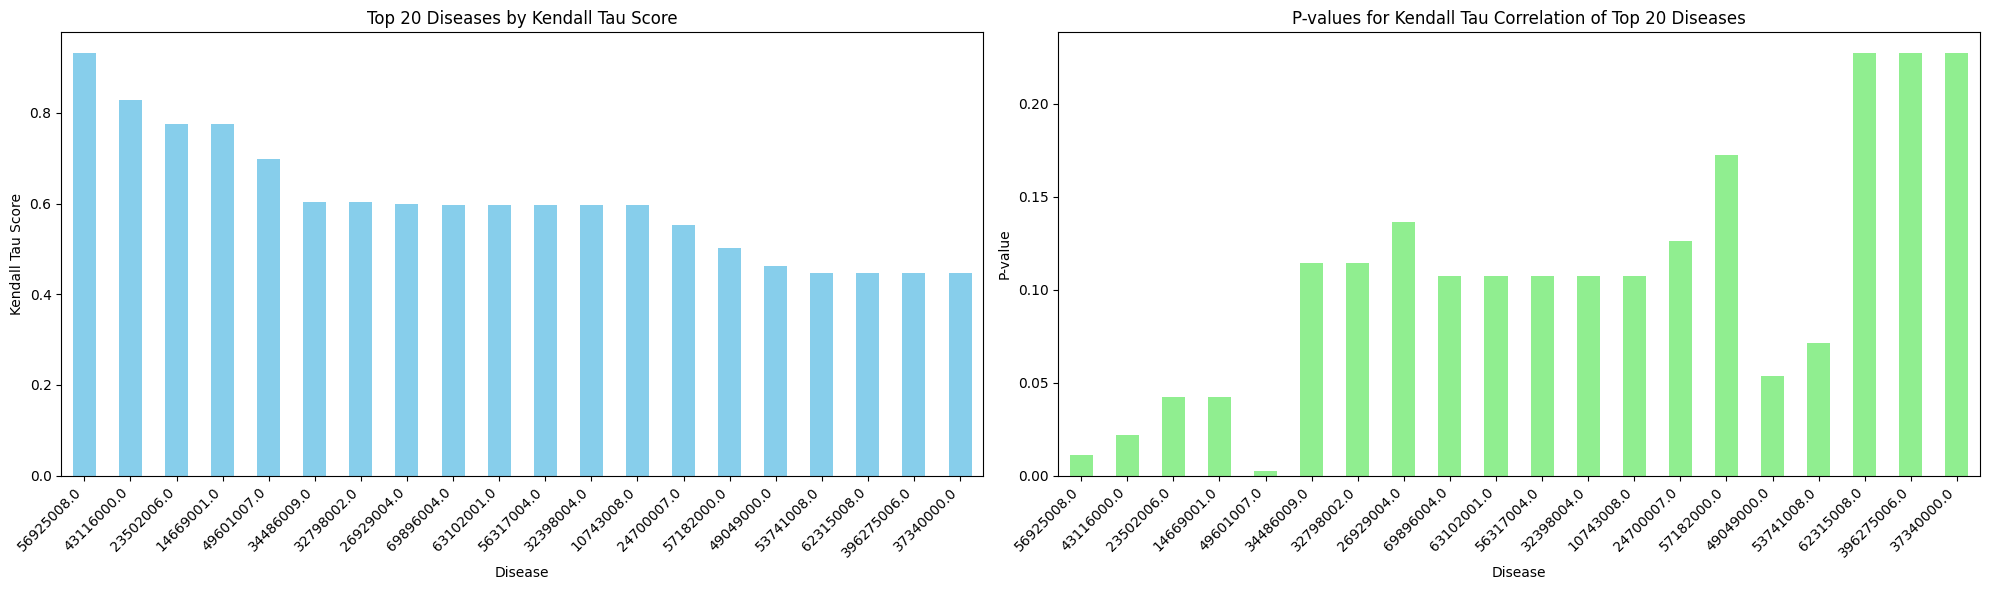

In [36]:
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

# Assuming sorted_df is your DataFrame

# Calculate Kendall tau and p-values for each disease
results = sorted_df.groupby('disease').apply(lambda x: kendalltau(x['logit_rank'], x['count_rank']))
kendall_tau_scores = results.apply(lambda x: x[0])
p_values = results.apply(lambda x: x[1])

# Sort by Kendall tau score and select top N diseases for visualization
top_n = 20
top_diseases_by_tau = kendall_tau_scores.sort_values(ascending=False).head(top_n)
top_diseases_p_values = p_values[top_diseases_by_tau.index]

# Set up the matplotlib figure (figure size and subplot layout)
plt.figure(figsize=(20, 6))

# Plot for Kendall Tau Scores
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
top_diseases_by_tau.plot(kind='bar', color='skyblue')
plt.xlabel('Disease')
plt.ylabel('Kendall Tau Score')
plt.title('Top 20 Diseases by Kendall Tau Score')
plt.xticks(rotation=45, ha='right')

# Plot for P-values
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
top_diseases_p_values.plot(kind='bar', color='lightgreen')
plt.xlabel('Disease')
plt.ylabel('P-value')
plt.title('P-values for Kendall Tau Correlation of Top 20 Diseases')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels
plt.show()


/var/folders/bz/dmt639hd4zqck2f7f3v313j00000gn/T/ipykernel_2207/3883262670.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = sorted_df.groupby('disease').apply(lambda x: kendalltau(x['logit_rank'], x['count_rank']))


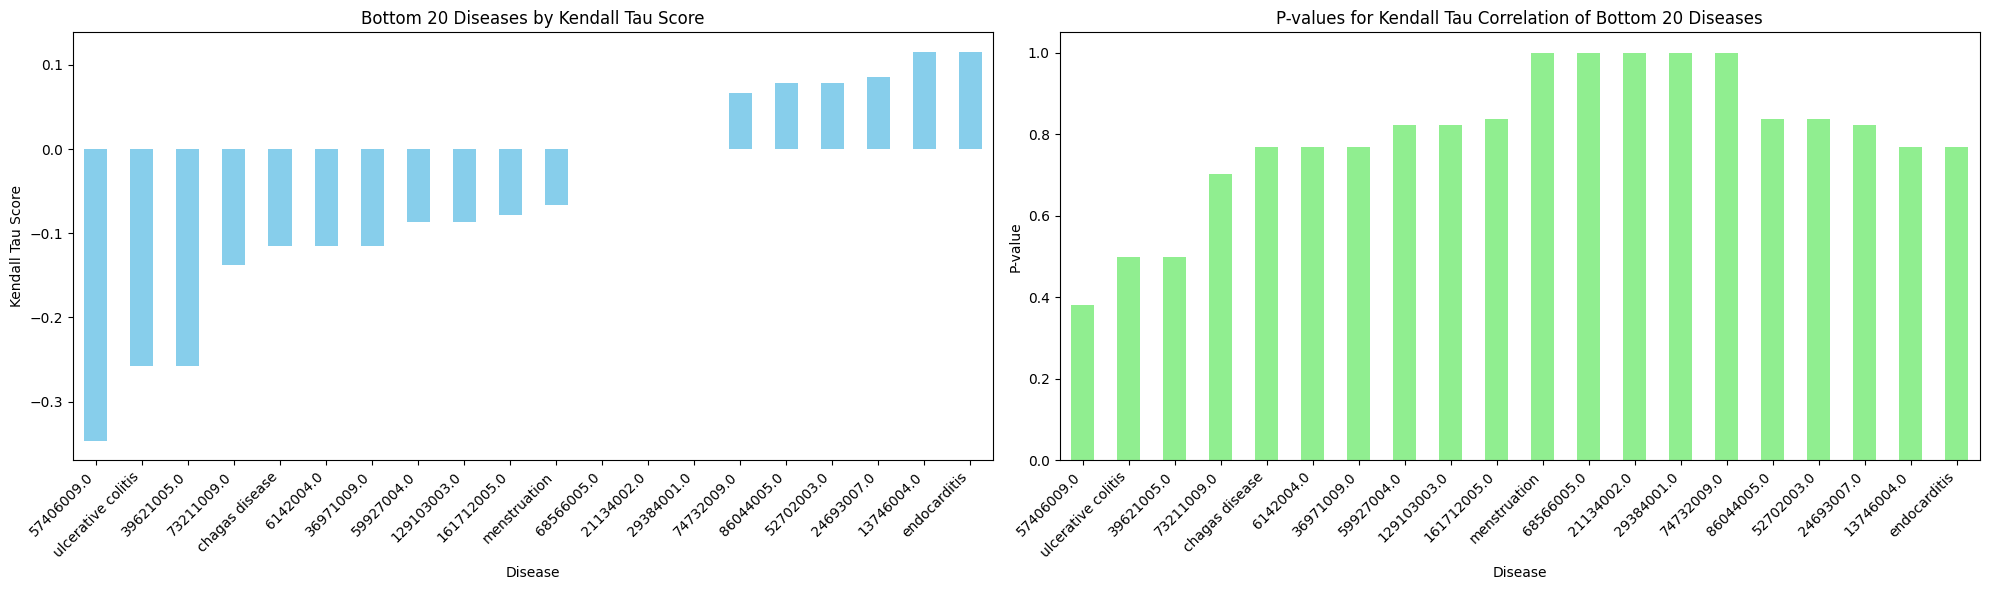

In [37]:
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

# Assuming sorted_df is your DataFrame

# Calculate Kendall tau and p-values for each disease
results = sorted_df.groupby('disease').apply(lambda x: kendalltau(x['logit_rank'], x['count_rank']))
kendall_tau_scores = results.apply(lambda x: x[0])
p_values = results.apply(lambda x: x[1])

# Sort by Kendall tau score and select bottom N diseases for visualization
top_n = 20
bottom_diseases_by_tau = kendall_tau_scores.sort_values(ascending=True).head(top_n)  # Select bottom N
bottom_diseases_p_values = p_values[bottom_diseases_by_tau.index]

# Set up the matplotlib figure (figure size and subplot layout)
plt.figure(figsize=(20, 6))

# Plot for Kendall Tau Scores of Bottom Diseases
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
bottom_diseases_by_tau.plot(kind='bar', color='skyblue')
plt.xlabel('Disease')
plt.ylabel('Kendall Tau Score')
plt.title('Bottom 20 Diseases by Kendall Tau Score')
plt.xticks(rotation=45, ha='right')

# Plot for P-values of Bottom Diseases
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
bottom_diseases_p_values.plot(kind='bar', color='lightgreen')
plt.xlabel('Disease')
plt.ylabel('P-value')
plt.title('P-values for Kendall Tau Correlation of Bottom 20 Diseases')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels
plt.show()


In [49]:
# Calculate Kendall tau and p-values for each disease
kendall_results = sorted_df.groupby('disease').apply(
    lambda x: kendalltau(x['logit_rank'], x['count_rank'])
).apply(pd.Series)
kendall_results.columns = ['Kendall_Tau', 'p_value']

/var/folders/bz/dmt639hd4zqck2f7f3v313j00000gn/T/ipykernel_2207/1064911860.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kendall_results = sorted_df.groupby('disease').apply(


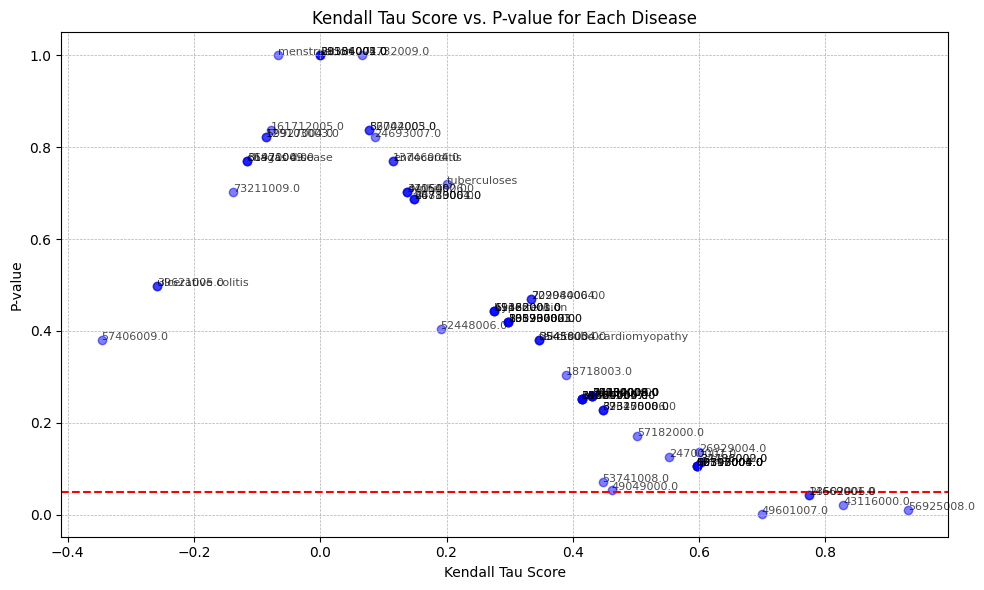

In [51]:
import matplotlib.pyplot as plt

# Assuming kendall_results is already defined and has 'Kendall_Tau' and 'p_value' as columns
# and the disease names are the index of the DataFrame.

plt.figure(figsize=(10, 6))
plt.scatter(kendall_results['Kendall_Tau'], kendall_results['p_value'], color='blue', alpha=0.5)
plt.title('Kendall Tau Score vs. P-value for Each Disease')
plt.xlabel('Kendall Tau Score')
plt.ylabel('P-value')
plt.axhline(y=0.05, color='r', linestyle='--')  # Add a line for the common significance level p=0.05
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Annotate points with disease names for clarity
for i, txt in enumerate(kendall_results.index):
    plt.annotate(txt, (kendall_results['Kendall_Tau'].iloc[i], kendall_results['p_value'].iloc[i]), fontsize=8, alpha=0.7)

plt.tight_layout()
plt.show()
